In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from google.colab import files
 
 
uploaded = files.upload()

Saving campeones_final.csv to campeones_final (1).csv


In [22]:
campeones_final = pd.read_csv ("campeones_final.csv")

In [23]:
campeones_final.head(5)

,Unnamed: 0,name,Incremento HP,Total HP,Incremento Magic Power,Total Magic Power,Incremento Attack Damage,Incremento Attack Speed,Incremento Attack Resistance,Total Attack Damage,...,Defensa,AP,Pasiva,Posicion,Play Rate,TOP Play Rate,Jungle Play Rate,MID Play Rate,ADC Play Rate,Support Play Rate
0,0,Aatrox,1530.0,2110.00,0.0,0.0,85.00,42.500,55.25,145.0000,...,4,3,Deathbringer Stance,TOP,6.776554,6.409202,0.018245,0.349107,0.000000,0.000000
1,1,Ahri,1564.0,2090.00,425.0,843.0,51.00,34.000,59.50,104.0400,...,4,8,Essence Theft,MID,4.652497,0.016624,0.000000,4.514049,0.006099,0.115726
2,2,Akali,1615.0,2190.00,0.0,200.0,56.10,54.400,59.50,118.5000,...,3,8,Assassin's Mark,MID,15.285494,4.308408,0.000000,10.976777,0.000000,0.000309
3,3,Alistar,1802.0,2375.36,680.0,1030.0,61.54,36.125,59.50,122.6516,...,9,5,Triumphant Roar,Support,6.734942,0.003191,0.000000,0.000000,0.000000,6.731751
4,4,Amumu,1428.0,2041.12,680.0,967.2,64.60,37.060,64.60,117.9800,...,6,8,Cursed Touch,Jungle,1.945180,0.002934,1.941346,0.000000,0.000000,0.000901


In [24]:
campeones_final = campeones_final.drop(["Unnamed: 0"], axis=1)

In [25]:
campeones_final

,name,Incremento HP,Total HP,Incremento Magic Power,Total Magic Power,Incremento Attack Damage,Incremento Attack Speed,Incremento Attack Resistance,Total Attack Damage,Incremento Magic Resistance,...,Defensa,AP,Pasiva,Posicion,Play Rate,TOP Play Rate,Jungle Play Rate,MID Play Rate,ADC Play Rate,Support Play Rate
0,Aatrox,1530.0,2110.00,0.0,0.0,85.00,42.500,55.25,145.0000,21.25,...,4,3,Deathbringer Stance,TOP,6.776554,6.409202,0.018245,0.349107,0.000000,0.000000
1,Ahri,1564.0,2090.00,425.0,843.0,51.00,34.000,59.50,104.0400,8.50,...,4,8,Essence Theft,MID,4.652497,0.016624,0.000000,4.514049,0.006099,0.115726
2,Akali,1615.0,2190.00,0.0,200.0,56.10,54.400,59.50,118.5000,21.25,...,3,8,Assassin's Mark,MID,15.285494,4.308408,0.000000,10.976777,0.000000,0.000309
3,Alistar,1802.0,2375.36,680.0,1030.0,61.54,36.125,59.50,122.6516,21.25,...,9,5,Triumphant Roar,Support,6.734942,0.003191,0.000000,0.000000,0.000000,6.731751
4,Amumu,1428.0,2041.12,680.0,967.2,64.60,37.060,64.60,117.9800,21.25,...,6,8,Cursed Touch,Jungle,1.945180,0.002934,1.941346,0.000000,0.000000,0.000901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Zed,1445.0,2029.00,0.0,200.0,57.80,56.100,59.50,120.8000,21.25,...,2,1,Contempt for the Weak,MID,11.882304,0.262821,0.214338,11.399663,0.005481,0.000000
142,Ziggs,1564.0,2100.00,399.5,879.5,52.70,34.000,56.10,106.9080,8.50,...,4,9,Short Fuse,MID,3.649490,0.000000,0.000000,2.453941,0.962631,0.232918
143,Zilean,1394.0,1898.00,510.0,962.0,51.00,36.210,64.60,102.6400,8.50,...,5,8,Time In A Bottle,Support,4.401643,0.028899,0.000000,0.437838,0.005250,3.929656
144,Zoe,1564.0,2124.00,425.0,850.0,56.10,42.500,59.50,114.1000,8.50,...,7,8,More Sparkles!,MID,2.817021,0.003886,0.000000,2.732176,0.000952,0.080007


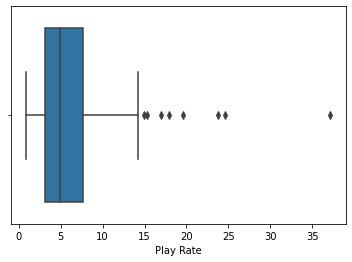

In [26]:
sns.boxplot(x="Play Rate", data=campeones_final);

Hay varios outliers destacables en el play rate, vamos a buscar si tiene alguna relación notable con otra variable

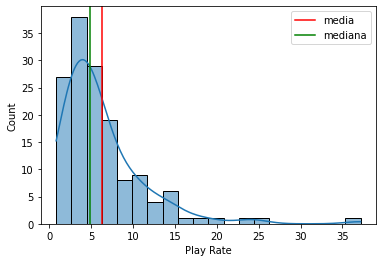

In [27]:
media_play = campeones_final["Play Rate"].mean()
mediana_play = campeones_final["Play Rate"].median()
graf = sns.histplot(campeones_final['Play Rate'], bins = 20, kde = True)
graf.axvline(x=media_play, c="red", label="media")
graf.axvline(x=mediana_play, c="green", label="mediana")

plt.legend()
plt.show();

No afectan demasiado a la media y a la mediana de la variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


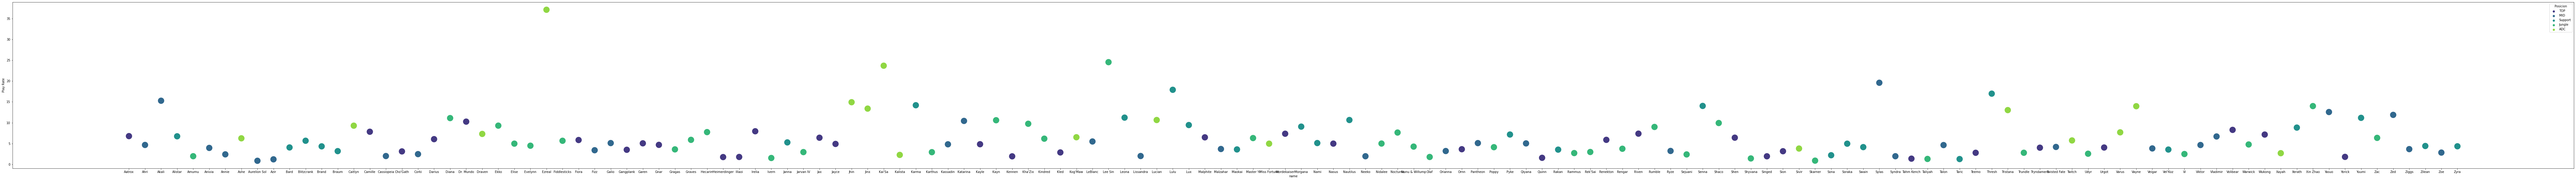

In [66]:
sns.scatterplot('name', 'Play Rate', data = campeones_final,  
                hue = 'Posicion', 
                s = 500, 
               palette = "viridis") 

plt.gcf().set_size_inches(150, 10)

plt.show(); 


De los 3 campeones más usados, 2 son tiradores. Clara tendencia. Identificamos a los ruidoblanco.

In [73]:
Posiciones = ["TOP, JUNGLA, MID, ADC, SUPPORT"]

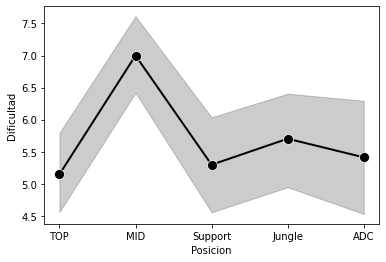

In [75]:
fig = sns.lineplot(data=campeones_final, x="Posicion", y="Dificultad",
                    color = "black",
                    marker = "o",
                    markersize = 10, 
                   linewidth = 2); 

                     

plt.show();

Se ve claramente la diferencia de la dificultad de los MID con el resto de roles, siendo este el campeón que suele tener daño en el equipo junto con el ADC, pero este  no parece para nada difícil en comparación. De primeras puede parecer descompensado y justificaría la elección de estos campeones

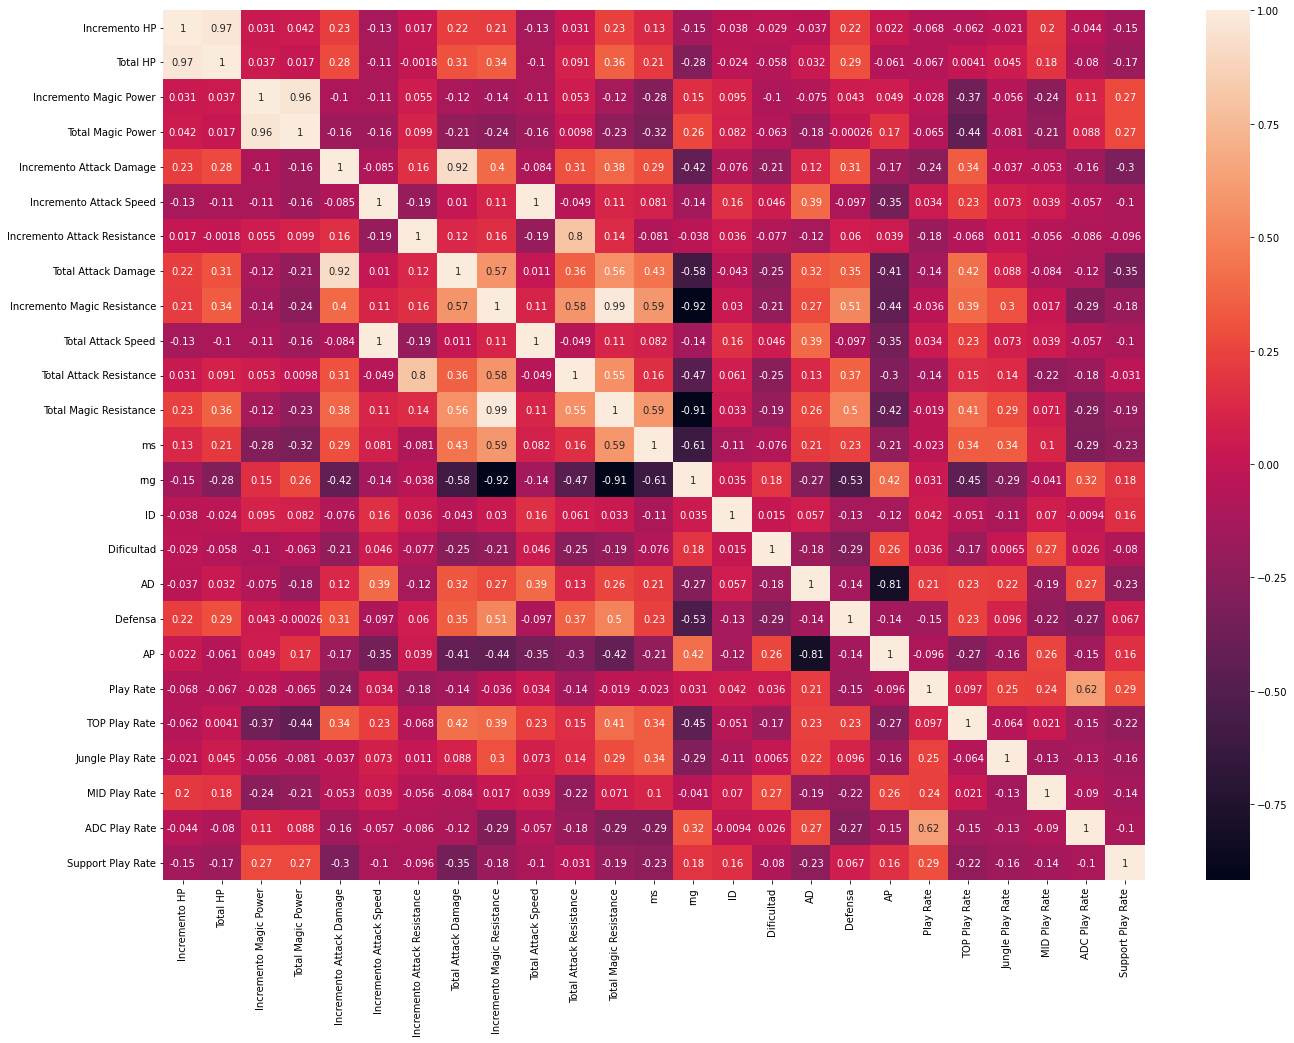

In [29]:
corr_df = campeones_final.corr(method='pearson')

plt.figure(figsize=(22, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

1.   Resistencia mágica y daño son opuestos = Los tanques son de corto alcance
2.   Muy diferenciados los personajes, en términos de estadísitcas, en cuanto a si se enfocan en daño físico o mágico
3.   No hay excesiva relación entre las estadísticas base e incremento de los personajes y la clasificación que hace Riot de sus personajes. P.E: solo hay 0,17 de correlación entre la clasificación AP (del 1 al 10 lo enfocado que está el personaje en daño mágico) y el daño mágico total que desarrolla el personaje con la evolución. Lo mismo pasa con el daño físico (0,32)
4.   El rol favorito, sin duda, es el de tirador, dado que el 62% de los jugadores lo eligen. Sorprende que el rol menos elegido sea el TOP y no el support, que sería el esperado, al ser el jugador de apoyo del equipo.
5.   A mayor dificultad de uso del personaje no hay mejores estadísticas. El juego no recompensa esto dando facilidades, sino que premia a la pura skill.
6.   La aparición de los tanques (personajes con mayor resistencia) se da en el TOP con lo que se ve que el meta del juego en este rol va en esa línea y eso podría ser la razón por la cual es el rol menos jugado. Antes este rol solía ser el de support y por ello se jugaba menos, pero se han cambiado las tornas.
7.   La clasificación de defensa dada por Riot sí que tiene mucha más correlación con las resistencias desarrolladas por los personajes (0,5). Esto parece hacer indicar que sí que hay personajes de por sí dedicados a resistencia y tanqueo, pero que la construcción de los personajes ofensivos depende 100% de la compra de objetos que se haga y no de las estadísticas del personaje. De nuevo, el videojuego recompensando la skill; si eres mejor que el rival con un personaje de daño, le eliminarás, ganarás más oro que él y por tanto harás snowball al tener más objetos que él con el otro extra que irás ganando (cada kill da oro)
8.   El rol con mayor correlación con la dificultad es el MID, dado que suelen ser los personajes de mayor daño y más skill.
9.   En contraposición, el rol de TOP es el de menor dificultad y rango. Se confirma la dinámica de tanques en esta posición.
10.   Sorprende encontrarse la correlación negativa entre los personajes de rango y las estadísticas de velocidad de ataque y daño de ataque (-0,58 esta última!!!!). De nuevo el juego se muestra exigente y a aquellos personajes que atacan de lejos y están destinados a hacer el mayor daño desde la retaguardia, les pone las cosas más difíciles. Premia la skill y reduce la descompensación vista previamente a priori.
11.   Finalmente, podemos concluir que las estadísitcas base del juego intentan impedir el desarrollo de los personajes destinados a hacer daño y ganar la partida. Le ponen trabas, dado que el resto de roles escala mejor y premia la habilidad. El potencial de desarrollo de personaje real depende de objetos y escalado de habilidades con respecto a las estadísitcas, lo cual dejamos para un segundo análisis (seguimos con esto en próximos episodios)








